<div align="center">
    <strong>
  <h1>VALORANT</h1>
    </strong>
</div>

<div align="center">
    <strong>
  <h4>"Para aquellos interesados en el juego, solo lean las descripciones debajo de las graficas"<br>
"Para aquellos interesados en analisis de datos vean todo y contactenme si quieren aprender"</h4>
    </strong>
</div>


<p>By: Henry Sierra</p>
<p>E-mail: henrysie19@gmail.com </p>
<p>07/08/2023</p>


**_"Los verdaderos jugadores no dicen que es solo un juego"_**

Quiero mostrarte algunos analisis de uno de mis juegos mas recientes **VALORANT**.

Para iniciar el analisis tenía dos opciones. 
1. Importar los datos de de un repositorio que alguién se haya tomado el tiempo de extraer y que claramente tendría datos antiguos, dejando por fuera varios agentes del juego
2. Importar los datos desde una pagina oficial de valorant con los datos actuales utilizando WebScrapping(_proceso de extracción de contenidos y datos de sitios web mediante software_)

Claramente elegíria la opción 2 "_El que se podría complicar_"

#### importamos las librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
import seaborn as sns
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

<p>Utilizamos Selenium para manipular la pag.web y poder extraer la información</p>
Principalmente abriremos una instancia en chrome para ingresar la pag.web https

In [101]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

<p>Luego de que ingresamos el https nos damos cuenta que se crea un (Pop up) y necesitamos deshacernos de el</p>
Para eso debemos manipular la pagina con Selenium para que haga click en cerrar del Pop up

In [102]:
page_url = "https://tracker.gg/valorant/insights/agents"
driver.get(page_url)

time.sleep(10)
driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div/div/div[1]/div/div[2]").click()
#driver.find_element(By.cssSelector("button[class='flex-1 md:flex-none flex justify-center items-center text-center cursor-pointer px-2 md:px-4 py-2 border border-transparent text-xs leading-4 font-black rounded-md']")).click()

### Extracción de la tabla

In [103]:
titulos = driver.find_element(By.CLASS_NAME, "st-content")

In [104]:
titulos.text
#texto_titulos = titulos.text

# Imprimir el resultado
#print(texto_titulos)

'Tier S\nBrimstone\nController\n5.8%\n50.8%\n5.5%\n0.96\n-1.6\nKilljoy\nSentinel\n5.3%\n50.4%\n5.0%\n0.99\n4.5\nSage\nSentinel\n8.3%\n50.1%\n7.2%\n0.89\n-15.7\nReyna\nDuelist\n11.3%\n50.1%\n13.1%\n1.14\n10.4\nPhoenix\nDuelist\n3.4%\n50.0%\n3.7%\n1.08\n-7.4\nRaze\nDuelist\n7.2%\n49.9%\n7.7%\n1.04\n15.5\nTier A\nGekko\nInitiator\n3.1%\n49.5%\n2.8%\n0.91\n-11.6\nAstra\nController\n1.7%\n49.4%\n1.7%\n1.03\n3.7\nJett\nDuelist\n9.9%\n49.4%\n11.3%\n1.09\n12.3\nSkye\nInitiator\n5.9%\n49.4%\n5.4%\n0.92\n-8.6\nSova\nInitiator\n3.6%\n49.3%\n3.4%\n0.97\n2.2\nCypher\nSentinel\n3.5%\n49.2%\n3.4%\n0.99\n-0.8\nViper\nController\n2.4%\n49.1%\n2.2%\n0.97\n-2.0\nFade\nInitiator\n2.5%\n49.0%\n2.3%\n0.91\n-9.2\nDeadlock\nSentinel\n4.1%\n48.9%\n4.0%\n0.97\n-5.9\nTier B\nBreach\nInitiator\n3.1%\n48.8%\n2.9%\n0.93\n-6.9\nChamber\nSentinel\n3.6%\n48.8%\n3.9%\n1.08\n8.9\nOmen\nController\n8.3%\n48.6%\n8.1%\n0.97\n-4.1\nNeon\nDuelist\n1.9%\n47.9%\n2.0%\n0.97\n-3.1\nTier C\nTier D\nYoru\nDuelist\n1.9%\n46.7%\n1.9

Para convertir los datos extraidos en un dataframe, debemos convertirlos en una lista y para eso, principalmente lo que haremos será, remplazar los \n por comas y luego agregaremos las comillas simples a cada dato

In [105]:
data = "TierS\nBrimstone\nController\n5.8%\n50.8%\n5.4%\n0.96\n-1.6\nKilljoy\nSentinel\n5.3%\n50.4%\n5.0%\n0.99\n4.5\nSage\nSentinel\n8.3%\n50.2%\n7.2%\n0.89\n-15.7\nReyna\nDuelist\n11.3%\n50.1%\n13.1%\n1.14\n10.4\nPhoenix\nDuelist\n3.4%\n50.1%\n3.7%\n1.08\n-7.4\nRaze\nDuelist\n7.1%\n49.9%\n7.7%\n1.04\n15.5\nTier A\nGekko\nInitiator\n3.1%\n49.5%\n2.8%\n0.91\n-11.6\nAstra\nController\n1.7%\n49.4%\n1.7%\n1.03\n3.7\nJett\nDuelist\n9.9%\n49.4%\n11.2%\n1.09\n12.2\nSkye\nInitiator\n5.9%\n49.4%\n5.4%\n0.92\n-8.6\nSova\nInitiator\n3.6%\n49.3%\n3.4%\n0.97\n2.2\nCypher\nSentinel\n3.5%\n49.2%\n3.3%\n0.99\n-0.7\nViper\nController\n2.4%\n49.1%\n2.2%\n0.97\n-2.0\nFade\nInitiator\n2.5%\n49.0%\n2.3%\n0.91\n-9.2\nDeadlock\nSentinel\n4.5%\n48.9%\n4.3%\n0.97\n-5.9\nTier B\nBreach\nInitiator\n3.1%\n48.8%\n2.9%\n0.93\n-6.8\nChamber\nSentinel\n3.6%\n48.8%\n3.8%\n1.08\n8.9\nOmen\nController\n8.3%\n48.7%\n8.0%\n0.97\n-4.0\nNeon\nDuelist\n1.9%\n47.9%\n2.0%\n0.97\n-3.0\nTier C\nTier D\nYoru\nDuelist\n1.9%\n46.7%\n1.9%\n0.98\n-1.6\nHarbor\nController\n0.8%\n46.4%\n0.8%\n0.90\n-12.4\nKAY/O\nInitiator\n2.2%\n45.9%\n2.0%\n0.89\n-11.5"
# Eliminar '\n' y agregar las comillas simples
data_cleaned = data.replace('\n', "','")
data_cleaned = f"'{data_cleaned}'"

print(data_cleaned)

'TierS','Brimstone','Controller','5.8%','50.8%','5.4%','0.96','-1.6','Killjoy','Sentinel','5.3%','50.4%','5.0%','0.99','4.5','Sage','Sentinel','8.3%','50.2%','7.2%','0.89','-15.7','Reyna','Duelist','11.3%','50.1%','13.1%','1.14','10.4','Phoenix','Duelist','3.4%','50.1%','3.7%','1.08','-7.4','Raze','Duelist','7.1%','49.9%','7.7%','1.04','15.5','Tier A','Gekko','Initiator','3.1%','49.5%','2.8%','0.91','-11.6','Astra','Controller','1.7%','49.4%','1.7%','1.03','3.7','Jett','Duelist','9.9%','49.4%','11.2%','1.09','12.2','Skye','Initiator','5.9%','49.4%','5.4%','0.92','-8.6','Sova','Initiator','3.6%','49.3%','3.4%','0.97','2.2','Cypher','Sentinel','3.5%','49.2%','3.3%','0.99','-0.7','Viper','Controller','2.4%','49.1%','2.2%','0.97','-2.0','Fade','Initiator','2.5%','49.0%','2.3%','0.91','-9.2','Deadlock','Sentinel','4.5%','48.9%','4.3%','0.97','-5.9','Tier B','Breach','Initiator','3.1%','48.8%','2.9%','0.93','-6.8','Chamber','Sentinel','3.6%','48.8%','3.8%','1.08','8.9','Omen','Controller','8

<p>Aqui nos encontramos con un problema para dividir los datos y convertirlos en lineas de igual cantidad, y esto pasa porque algunas datos contienen el dato Tier que solo es un dato categorico que no nos servira para el analisis y para eso debemos eliminar ese dato</p>
Para poder dividir los datos en grupos de igual cantidad, debemos eliminar los datos que contengan la palabra Tier y crear un nuevo grupo de datos sin las filas que contengan esa palabra

In [106]:
data = "'TierS','Brimstone','Controller','5.8%','50.8%','5.4%','0.96','-1.6','Killjoy','Sentinel','5.3%','50.4%','5.0%','0.99','4.5','Sage','Sentinel','8.3%','50.2%','7.2%','0.89','-15.7','Reyna','Duelist','11.3%','50.1%','13.1%','1.14','10.4','Phoenix','Duelist','3.4%','50.1%','3.7%','1.08','-7.4','Raze','Duelist','7.1%','49.9%','7.7%','1.04','15.5','Tier A','Gekko','Initiator','3.1%','49.5%','2.8%','0.91','-11.6','Astra','Controller','1.7%','49.4%','1.7%','1.03','3.7','Jett','Duelist','9.9%','49.4%','11.2%','1.09','12.2','Skye','Initiator','5.9%','49.4%','5.4%','0.92','-8.6','Sova','Initiator','3.6%','49.3%','3.4%','0.97','2.2','Cypher','Sentinel','3.5%','49.2%','3.3%','0.99','-0.7','Viper','Controller','2.4%','49.1%','2.2%','0.97','-2.0','Fade','Initiator','2.5%','49.0%','2.3%','0.91','-9.2','Deadlock','Sentinel','4.5%','48.9%','4.3%','0.97','-5.9','Tier B','Breach','Initiator','3.1%','48.8%','2.9%','0.93','-6.8','Chamber','Sentinel','3.6%','48.8%','3.8%','1.08','8.9','Omen','Controller','8.3%','48.7%','8.0%','0.97','-4.0','Neon','Duelist','1.9%','47.9%','2.0%','0.97','-3.0','Tier C','Tier D','Yoru','Duelist','1.9%','46.7%','1.9%','0.98','-1.6','Harbor','Controller','0.8%','46.4%','0.8%','0.90','-12.4','KAY/O','Initiator','2.2%','45.9%','2.0%','0.89','-11.5'"

# Dividir los datos por las comas
data_list = data.split(',')

# Filtrar las filas que no contienen la palabra 'Tier'
filtered_data = [row for row in data_list if 'Tier' not in row]

print(filtered_data)

["'Brimstone'", "'Controller'", "'5.8%'", "'50.8%'", "'5.4%'", "'0.96'", "'-1.6'", "'Killjoy'", "'Sentinel'", "'5.3%'", "'50.4%'", "'5.0%'", "'0.99'", "'4.5'", "'Sage'", "'Sentinel'", "'8.3%'", "'50.2%'", "'7.2%'", "'0.89'", "'-15.7'", "'Reyna'", "'Duelist'", "'11.3%'", "'50.1%'", "'13.1%'", "'1.14'", "'10.4'", "'Phoenix'", "'Duelist'", "'3.4%'", "'50.1%'", "'3.7%'", "'1.08'", "'-7.4'", "'Raze'", "'Duelist'", "'7.1%'", "'49.9%'", "'7.7%'", "'1.04'", "'15.5'", "'Gekko'", "'Initiator'", "'3.1%'", "'49.5%'", "'2.8%'", "'0.91'", "'-11.6'", "'Astra'", "'Controller'", "'1.7%'", "'49.4%'", "'1.7%'", "'1.03'", "'3.7'", "'Jett'", "'Duelist'", "'9.9%'", "'49.4%'", "'11.2%'", "'1.09'", "'12.2'", "'Skye'", "'Initiator'", "'5.9%'", "'49.4%'", "'5.4%'", "'0.92'", "'-8.6'", "'Sova'", "'Initiator'", "'3.6%'", "'49.3%'", "'3.4%'", "'0.97'", "'2.2'", "'Cypher'", "'Sentinel'", "'3.5%'", "'49.2%'", "'3.3%'", "'0.99'", "'-0.7'", "'Viper'", "'Controller'", "'2.4%'", "'49.1%'", "'2.2%'", "'0.97'", "'-2.0'", 

<p>Ahora para convertir los datos en listas por grupo de igual tamaño debemos dividir los datos en grupos y encerrar cada grupo entre corchetes, usando la función 'split()'</p>
Y así crear el dataframe

In [107]:
data = ""'Brimstone'", "'Controller'", "'5.8%'", "'50.8%'", "'5.4%'", "'0.96'", "'-1.6'", "'Killjoy'", "'Sentinel'", "'5.3%'", "'50.4%'", "'5.0%'", "'0.99'", "'4.5'", "'Sage'", "'Sentinel'", "'8.3%'", "'50.2%'", "'7.2%'", "'0.89'", "'-15.7'", "'Reyna'", "'Duelist'", "'11.3%'", "'50.1%'", "'13.1%'", "'1.14'", "'10.4'", "'Phoenix'", "'Duelist'", "'3.4%'", "'50.1%'", "'3.7%'", "'1.08'", "'-7.4'", "'Raze'", "'Duelist'", "'7.1%'", "'49.9%'", "'7.7%'", "'1.04'", "'15.5'", "'Gekko'", "'Initiator'", "'3.1%'", "'49.5%'", "'2.8%'", "'0.91'", "'-11.6'", "'Astra'", "'Controller'", "'1.7%'", "'49.4%'", "'1.7%'", "'1.03'", "'3.7'", "'Jett'", "'Duelist'", "'9.9%'", "'49.4%'", "'11.2%'", "'1.09'", "'12.2'", "'Skye'", "'Initiator'", "'5.9%'", "'49.4%'", "'5.4%'", "'0.92'", "'-8.6'", "'Sova'", "'Initiator'", "'3.6%'", "'49.3%'", "'3.4%'", "'0.97'", "'2.2'", "'Cypher'", "'Sentinel'", "'3.5%'", "'49.2%'", "'3.3%'", "'0.99'", "'-0.7'", "'Viper'", "'Controller'", "'2.4%'", "'49.1%'", "'2.2%'", "'0.97'", "'-2.0'", "'Fade'", "'Initiator'", "'2.5%'", "'49.0%'", "'2.3%'", "'0.91'", "'-9.2'", "'Deadlock'", "'Sentinel'", "'4.5%'", "'48.9%'", "'4.3%'", "'0.97'", "'-5.9'", "'Breach'", "'Initiator'", "'3.1%'", "'48.8%'", "'2.9%'", "'0.93'", "'-6.8'", "'Chamber'", "'Sentinel'", "'3.6%'", "'48.8%'", "'3.8%'", "'1.08'", "'8.9'", "'Omen'", "'Controller'", "'8.3%'", "'48.7%'", "'8.0%'", "'0.97'", "'-4.0'", "'Neon'", "'Duelist'", "'1.9%'", "'47.9%'", "'2.0%'", "'0.97'", "'-3.0'", "'Yoru'", "'Duelist'", "'1.9%'", "'46.7%'", "'1.9%'", "'0.98'", "'-1.6'", "'Harbor'", "'Controller'", "'0.8%'", "'46.4%'", "'0.8%'", "'0.90'", "'-12.4'", "'KAY/O'", "'Initiator'", "'2.2%'", "'45.9%'", "'2.0%'", "'0.89'", "'-11.5'""

# Dividir los datos por las comas
data_list = data.split(',')

# Encerrar cada grupo entre corchetes [ ]
grouped_data = [data_list[i:i+7] for i in range(0, len(data_list), 7)]

print(grouped_data)

[['Brimstone', ' Controller', ' 5.8%', ' 50.8%', ' 5.4%', ' 0.96', ' -1.6'], [' Killjoy', ' Sentinel', ' 5.3%', ' 50.4%', ' 5.0%', ' 0.99', ' 4.5'], [' Sage', ' Sentinel', ' 8.3%', ' 50.2%', ' 7.2%', ' 0.89', ' -15.7'], [' Reyna', ' Duelist', ' 11.3%', ' 50.1%', ' 13.1%', ' 1.14', ' 10.4'], [' Phoenix', ' Duelist', ' 3.4%', ' 50.1%', ' 3.7%', ' 1.08', ' -7.4'], [' Raze', ' Duelist', ' 7.1%', ' 49.9%', ' 7.7%', ' 1.04', ' 15.5'], [' Gekko', ' Initiator', ' 3.1%', ' 49.5%', ' 2.8%', ' 0.91', ' -11.6'], [' Astra', ' Controller', ' 1.7%', ' 49.4%', ' 1.7%', ' 1.03', ' 3.7'], [' Jett', ' Duelist', ' 9.9%', ' 49.4%', ' 11.2%', ' 1.09', ' 12.2'], [' Skye', ' Initiator', ' 5.9%', ' 49.4%', ' 5.4%', ' 0.92', ' -8.6'], [' Sova', ' Initiator', ' 3.6%', ' 49.3%', ' 3.4%', ' 0.97', ' 2.2'], [' Cypher', ' Sentinel', ' 3.5%', ' 49.2%', ' 3.3%', ' 0.99', ' -0.7'], [' Viper', ' Controller', ' 2.4%', ' 49.1%', ' 2.2%', ' 0.97', ' -2.0'], [' Fade', ' Initiator', ' 2.5%', ' 49.0%', ' 2.3%', ' 0.91', ' -9.

#### Creación del dataframe

In [108]:
df = pd.DataFrame(grouped_data)
print(df)

            0            1       2       3       4      5       6
0   Brimstone   Controller    5.8%   50.8%    5.4%   0.96    -1.6
1     Killjoy     Sentinel    5.3%   50.4%    5.0%   0.99     4.5
2        Sage     Sentinel    8.3%   50.2%    7.2%   0.89   -15.7
3       Reyna      Duelist   11.3%   50.1%   13.1%   1.14    10.4
4     Phoenix      Duelist    3.4%   50.1%    3.7%   1.08    -7.4
5        Raze      Duelist    7.1%   49.9%    7.7%   1.04    15.5
6       Gekko    Initiator    3.1%   49.5%    2.8%   0.91   -11.6
7       Astra   Controller    1.7%   49.4%    1.7%   1.03     3.7
8        Jett      Duelist    9.9%   49.4%   11.2%   1.09    12.2
9        Skye    Initiator    5.9%   49.4%    5.4%   0.92    -8.6
10       Sova    Initiator    3.6%   49.3%    3.4%   0.97     2.2
11     Cypher     Sentinel    3.5%   49.2%    3.3%   0.99    -0.7
12      Viper   Controller    2.4%   49.1%    2.2%   0.97    -2.0
13       Fade    Initiator    2.5%   49.0%    2.3%   0.91    -9.2
14   Deadl

Como podemos ver en la tabla anterior, esta no contiene titulos por lo que en la siguiente linea de codigo se lo agregaremos

In [109]:
data = [['Brimstone', ' Controller', ' 5.8%', ' 50.8%', ' 5.4%', ' 0.96', ' -1.6'], [' Killjoy', ' Sentinel', ' 5.3%', ' 50.4%', ' 5.0%', ' 0.99', ' 4.5'], [' Sage', ' Sentinel', ' 8.3%', ' 50.2%', ' 7.2%', ' 0.89', ' -15.7'], [' Reyna', ' Duelist', ' 11.3%', ' 50.1%', ' 13.1%', ' 1.14', ' 10.4'], [' Phoenix', ' Duelist', ' 3.4%', ' 50.1%', ' 3.7%', ' 1.08', ' -7.4'], [' Raze', ' Duelist', ' 7.1%', ' 49.9%', ' 7.7%', ' 1.04', ' 15.5'], [' Gekko', ' Initiator', ' 3.1%', ' 49.5%', ' 2.8%', ' 0.91', ' -11.6'], [' Astra', ' Controller', ' 1.7%', ' 49.4%', ' 1.7%', ' 1.03', ' 3.7'], [' Jett', ' Duelist', ' 9.9%', ' 49.4%', ' 11.2%', ' 1.09', ' 12.2'], [' Skye', ' Initiator', ' 5.9%', ' 49.4%', ' 5.4%', ' 0.92', ' -8.6'], [' Sova', ' Initiator', ' 3.6%', ' 49.3%', ' 3.4%', ' 0.97', ' 2.2'], [' Cypher', ' Sentinel', ' 3.5%', ' 49.2%', ' 3.3%', ' 0.99', ' -0.7'], [' Viper', ' Controller', ' 2.4%', ' 49.1%', ' 2.2%', ' 0.97', ' -2.0'], [' Fade', ' Initiator', ' 2.5%', ' 49.0%', ' 2.3%', ' 0.91', ' -9.2'], [' Deadlock', ' Sentinel', ' 4.5%', ' 48.9%', ' 4.3%', ' 0.97', ' -5.9'], [' Breach', ' Initiator', ' 3.1%', ' 48.8%', ' 2.9%', ' 0.93', ' -6.8'], [' Chamber', ' Sentinel', ' 3.6%', ' 48.8%', ' 3.8%', ' 1.08', ' 8.9'], [' Omen', ' Controller', ' 8.3%', ' 48.7%', ' 8.0%', ' 0.97', ' -4.0'], [' Neon', ' Duelist', ' 1.9%', ' 47.9%', ' 2.0%', ' 0.97', ' -3.0'], [' Yoru', ' Duelist', ' 1.9%', ' 46.7%', ' 1.9%', ' 0.98', ' -1.6'], [' Harbor', ' Controller', ' 0.8%', ' 46.4%', ' 0.8%', ' 0.90', ' -12.4'], [' KAY/O', ' Initiator', ' 2.2%', ' 45.9%', ' 2.0%', ' 0.89', ' -11.5']]

# Convertir la lista de listas en un diccionario
columns = ['Agent', 'Role', 'Win %', 'Pick %', 'Kill %', 'K/D Ratio', 'DDΔ/Round']
data_dict = {columns[i]: [row[i] for row in data] for i in range(len(columns))}

# Crear el DataFrame
df = pd.DataFrame(data_dict)
data_valorant = df

print(data_valorant)

        Agent         Role   Win %  Pick %  Kill % K/D Ratio DDΔ/Round
0   Brimstone   Controller    5.8%   50.8%    5.4%      0.96      -1.6
1     Killjoy     Sentinel    5.3%   50.4%    5.0%      0.99       4.5
2        Sage     Sentinel    8.3%   50.2%    7.2%      0.89     -15.7
3       Reyna      Duelist   11.3%   50.1%   13.1%      1.14      10.4
4     Phoenix      Duelist    3.4%   50.1%    3.7%      1.08      -7.4
5        Raze      Duelist    7.1%   49.9%    7.7%      1.04      15.5
6       Gekko    Initiator    3.1%   49.5%    2.8%      0.91     -11.6
7       Astra   Controller    1.7%   49.4%    1.7%      1.03       3.7
8        Jett      Duelist    9.9%   49.4%   11.2%      1.09      12.2
9        Skye    Initiator    5.9%   49.4%    5.4%      0.92      -8.6
10       Sova    Initiator    3.6%   49.3%    3.4%      0.97       2.2
11     Cypher     Sentinel    3.5%   49.2%    3.3%      0.99      -0.7
12      Viper   Controller    2.4%   49.1%    2.2%      0.97      -2.0
13    

<p>Convertiremos el dataframe en un archivo excel o .xlsx</p>
Para facilitar la manipulación de los datos

In [ ]:
data_valorant.to_excel('data_valorant.xlsx')

In [124]:
data_valorant = pd.read_excel('data_valorant.xlsx')
print(data_valorant)

        Agent         Role  Win %  Pick %  Kill %  K/D Ratio  DDΔ/Round
0      Harbor   Controller  0.008   0.464   0.008       0.90      -12.4
1       Astra   Controller  0.017   0.494   0.017       1.03        3.7
2        Neon      Duelist  0.019   0.479   0.020       0.97       -3.0
3        Yoru      Duelist  0.019   0.467   0.019       0.98       -1.6
4       KAY/O    Initiator  0.022   0.459   0.020       0.89      -11.5
5       Viper   Controller  0.024   0.491   0.022       0.97       -2.0
6        Fade    Initiator  0.025   0.490   0.023       0.91       -9.2
7      Breach    Initiator  0.031   0.488   0.029       0.93       -6.8
8       Gekko    Initiator  0.031   0.495   0.028       0.91      -11.6
9     Phoenix      Duelist  0.034   0.501   0.037       1.08       -7.4
10     Cypher     Sentinel  0.035   0.492   0.033       0.99       -0.7
11    Chamber     Sentinel  0.036   0.488   0.038       1.08        8.9
12       Sova    Initiator  0.036   0.493   0.034       0.97    

### Graficos

#### Grafico de Barras

Grafico de barras de win% x Agente

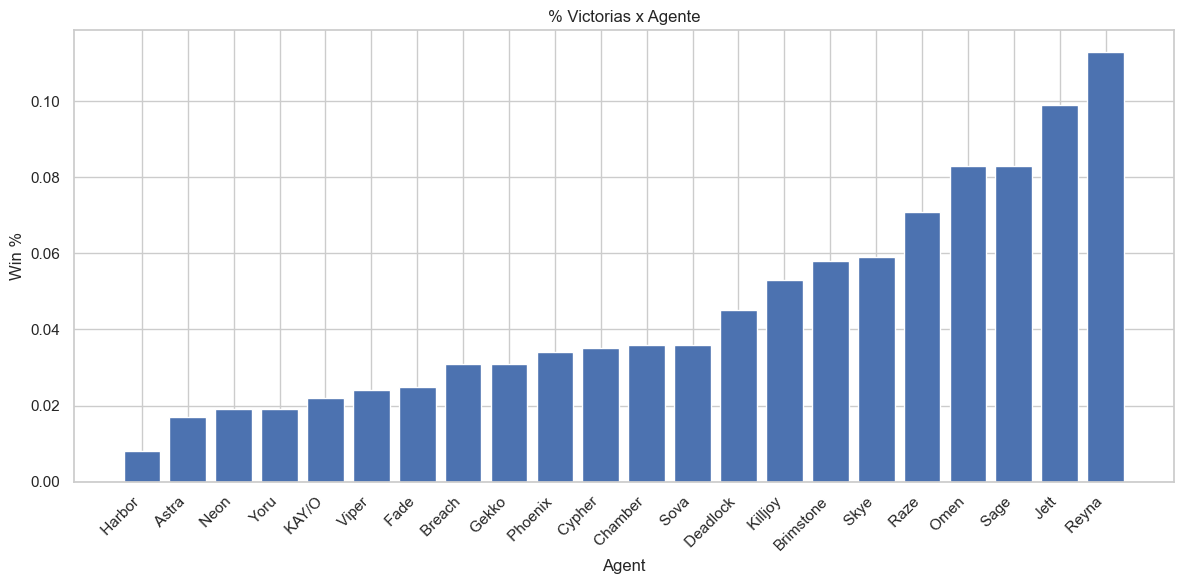

In [125]:
# Datos del DataFrame
valores_agentes = data_valorant[["Agent", "Win %"]]

valores_agentes = pd.DataFrame(data_valorant)

# Filtrar por valor de Win %
filtered_valores_agentes = valores_agentes[valores_agentes["Win %"] > 1] 

# Crear el gráfico de barras para el winrate por agente
plt.figure(figsize=(12, 6))
plt.bar(data_valorant['Agent'], data_valorant['Win %'])
plt.xlabel('Agent')
plt.ylabel('Win %')
plt.title('% Victorias x Agente')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas en el eje x para que sean legibles
plt.tight_layout()  # Ajustar el diseño del gráfico para evitar superposiciones
plt.show()

Reyna la duelista invencible, no hay mucho de que asombrarse, claramente sus habilidades de curación, segar, e invencibilidad la hacen la agente con mas Win% del juego

#### Grafico de barras de win% x Role

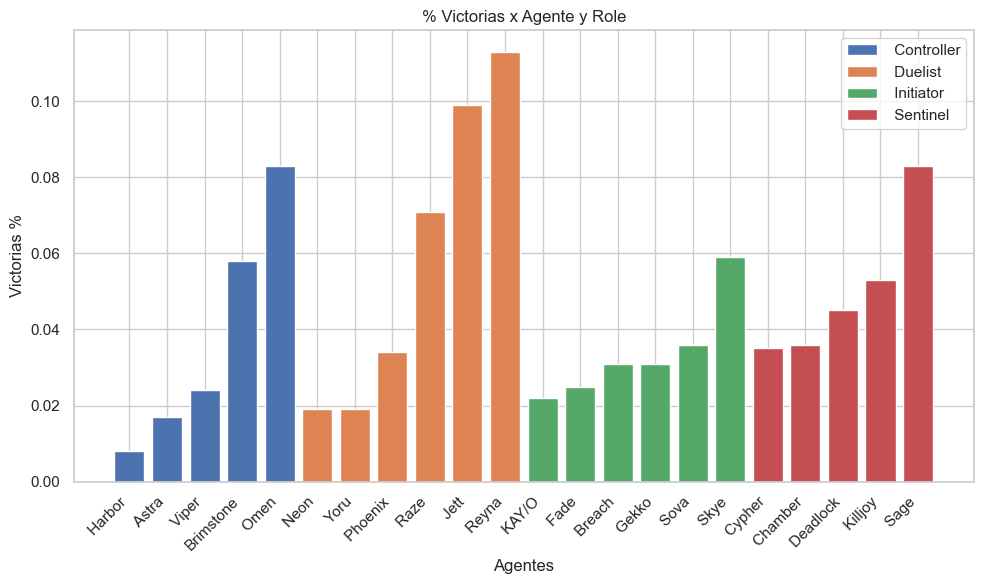

In [133]:
# Seleccionamos los datos que vamos a usar para la grafica
winrate_role = data_valorant[["Agent", "Role", "Win %"]]

#Grafico de barras
#Crear una paleta de colores para la grafica
color_palette = {"Duelist": "red", 
                 "Controller": "blue", 
                 "Sentinel": "green", 
                 "Initiator": "purple"}

#Crear el grafico de barras
plt.figure(figsize=(10, 6))
for role, role_data in winrate_role.groupby("Role"):
           plt.bar(role_data["Agent"], role_data["Win %"], color=color_palette.get(role), label=role)
           
plt.xlabel("Agentes")
plt.ylabel("Victorias %")
plt.title("% Victorias x Agente y Role")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<p>En este grafico podemos identificar que hemos separado los roles y saber cual es el win% mas alto por role siendo:</p>

CONTROLADOR -> OMEN<br>
INICIADOR -> SKYE<br>
SENTINELA -> SAGE<br>
DUELISTA -> REYNA<br>

#### Graficos de Dispersion

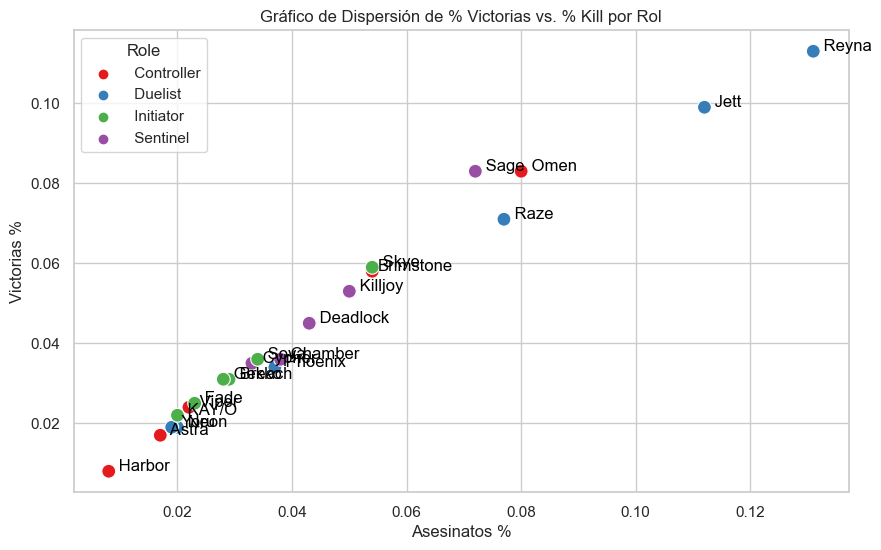

In [135]:
# Seleccionamos los datos que vamos a usar para la grafica
winrate_pick = data_valorant[["Agent", "Role", "Win %", "Kill %"]]

#Grafico de dispersion
# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de dispersión con colores por role y nombres de agentes
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=winrate_pick, x="Kill %", y="Win %", hue="Role", palette="Set1", s=100)

# Agrega los nombres de los agentes a los puntos
for line in range(0, df.shape[0]):
    scatter_plot.text(winrate_pick["Kill %"][line] + 0.001, winrate_pick["Win %"][line], winrate_pick["Agent"][line], horizontalalignment='left', size='medium', color='black')

# Configura las etiquetas de los ejes y el título
plt.xlabel("Asesinatos %")
plt.ylabel("Victorias %")
plt.title("Gráfico de Dispersión de % Victorias vs. % Kill por Rol")

# Muestra el gráfico
plt.show()

Lo que identificamos en esta grafica de dispersión, es que % asesinatos es directamente propoprcional con el %win que no sería nada raro

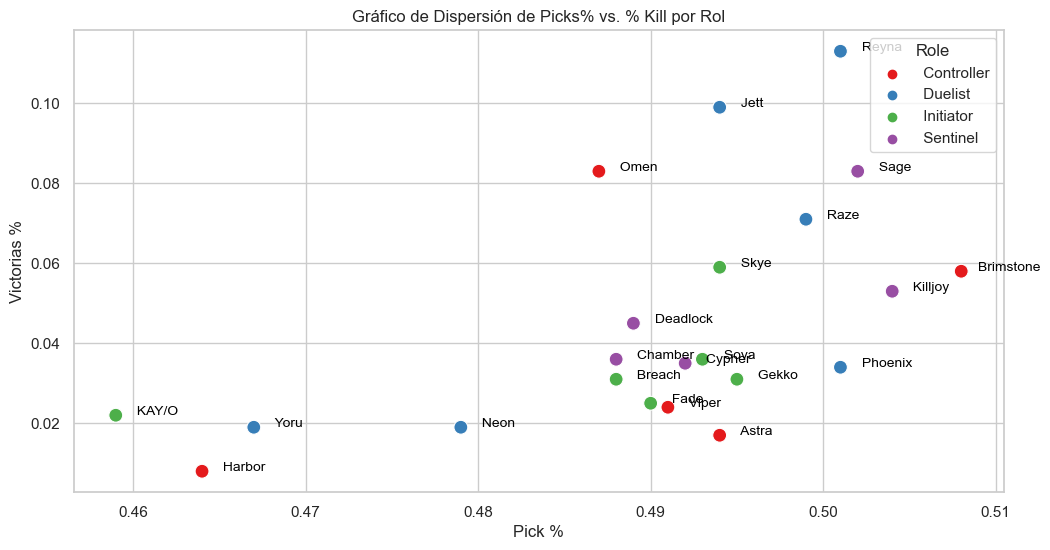

In [130]:
# #Grafico de dispersion pick% vs Win%
# Seleccionamos los datos que vamos a usar para la grafica
winrate_pick = data_valorant[["Agent", "Role", "Win %", "Pick %"]]

# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de dispersión con colores por role y nombres de agentes
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(data=winrate_pick, x="Pick %", y="Win %", hue="Role", palette="Set1", s=100)

# Agrega los nombres de los agentes a los puntos
for line in range(0, df.shape[0]):
    scatter_plot.text(winrate_pick["Pick %"][line] + 0.001, winrate_pick["Win %"][line], winrate_pick["Agent"][line], horizontalalignment='left', size='small', color='black')

# Configura las etiquetas de los ejes y el título
plt.xlabel("Pick %")
plt.ylabel("Victorias %")
plt.title("Gráfico de Dispersión de Picks% vs. % Kill por Rol")

# Muestra el gráfico
plt.show()

En esta distribución estamos comparando el %win con los %pick(Seleccion del agente)<br>
1. Me sorprende como el agente BRIMSTON es el mas elegido de la lista<br>
2. El agente Harbor teniendo el peor %win lo escogen mas que KAY/O.<br>
3. Cualquier jugador que vea esto dejara de escoger a Harbor xD<br>
4. otra de las cosas que me sorprende de este grafico es; como duelistas que me gustan como YORU y NEON tienen un %win bastante desastroso<br>


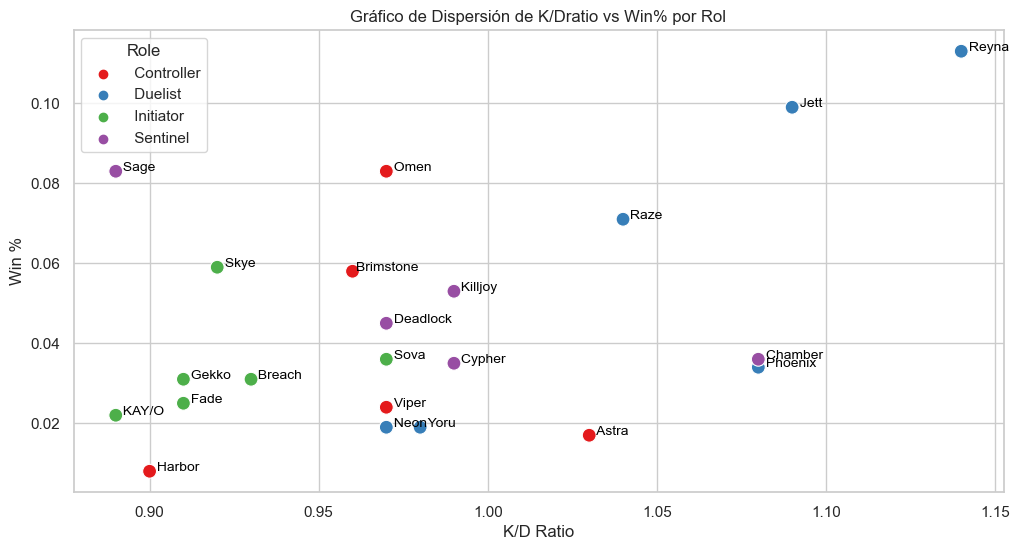

In [131]:
# Grafico de dispersion K/D ratio % vs Win%
# Seleccionamos los datos que vamos a usar para la grafica
winrate_pick = data_valorant[["Agent", "Role", "Win %", "K/D Ratio"]]

# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de dispersión con colores por role y nombres de agentes
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(data=winrate_pick, x="K/D Ratio", y="Win %", hue="Role", palette="Set1", s=100)

# Agrega los nombres de los agentes a los puntos
for line in range(0, df.shape[0]):
    scatter_plot.text(winrate_pick["K/D Ratio"][line] + 0.001, winrate_pick["Win %"][line], winrate_pick["Agent"][line], horizontalalignment='left', size='small', color='black')

# Configura las etiquetas de los ejes y el título
plt.xlabel("K/D Ratio")
plt.ylabel("Win %")
plt.title("Gráfico de Dispersión de K/Dratio vs Win% por Rol")

# Muestra el gráfico
plt.show()

Desde mi ignorancia esperaría que el KDA(kill/death/Assistance) debería ser directamente proporcional al %win<br>
1. El agente SAGE con el peor ratio junto KAY/O tienen el peor KDA pero sage tiene un %win sorprendente
2. En todas las graficas que hemos visto hasta el momento OMEN sigue muy balanceado, siendo otro de mis agentes favoritos
3. Me parece muy extraño como HARBOR tiene mejor KDA que SAGE y KAY/O, perdiendo mas partidas
4. Al igual que ASTRA que tiene un excelente KDA siendo controladora, el %win es malisimo. quiero creer que le salen team malos

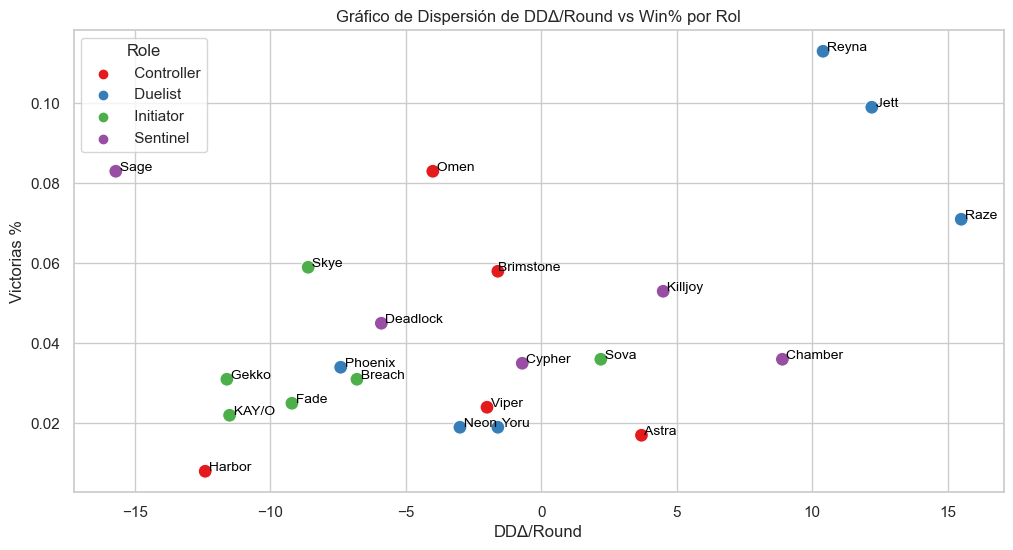

In [132]:
# Grafico de dispersion K/D ratio % vs Win%
# Seleccionamos los datos que vamos a usar para la grafica
winrate_pick = data_valorant[["Agent", "Role", "Win %", "DDΔ/Round"]]

# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de dispersión con colores por role y nombres de agentes
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(data=winrate_pick, x="DDΔ/Round", y="Win %", hue="Role", palette="Set1", s=100)

# Agrega los nombres de los agentes a los puntos
for line in range(0, df.shape[0]):
    scatter_plot.text(winrate_pick["DDΔ/Round"][line] + 0.001, winrate_pick["Win %"][line], winrate_pick["Agent"][line], horizontalalignment='left', size='small', color='black')

# Configura las etiquetas de los ejes y el título
plt.xlabel("DDΔ/Round")
plt.ylabel("Victorias %")
plt.title("Gráfico de Dispersión de DDΔ/Round vs Win% por Rol")

# Muestra el gráfico
plt.show()

Por ulltimo el DDΔ/Round("Daño Delta por Ronda" o daño recibido por ronda) vs %win
1. Cre que la unica grafíca hasta el momento donde REYNA no lidera y se puede enteder porque las habilidades de cada una de estas agentes son muy diferentes
   - REYNA tiene habilidades que hace que se cure el daño, como tambíen se haga invencible
   - RAZE sus habilidades son de frente a frente. habilidad 100%, lo que hace que sea mas fácil que reciba mas daños
2. SAGE obviamente iba a quedar por atras en esta grafica, los que saben usar esta agente saben que tienen que quedarse atras, curar y revivir a sus compañeros, lo que hace que no reviba daño
3. HARBOR ya me cansé de hablar de el, QUE LE HAGAN UN REWORK AL POBRE

<div align="center">
    <strong>
  <h1>CONCLUSION</h1>
    </strong>
</div>

Espero que este pequeño analisi les sirva a aquellos jugadores que desean mejorar si WINRATE cambiando de personajes y seleccionando los mejores hasta esta ultima actualización<br>
De igual manera con este informe quería destacar mis habilidades en Analisis de datos y que tambíen les ayude a aquellas personas que están intenresadas en este grandioso mundo


#### Posdata:
Tengo que cambiar mis agentes, estoy pickeando los malos xD